## Observations and Insights 

In [35]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import csv
import os
import numpy as np

# Study data files
mouse_metadata_path = os.path.join("../data","Mouse_metadata.csv")
study_results_path = os.path.join("../data","Study_results.csv")

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [36]:
# # test to use np.mean to calculate average
# mean_numpy2 = np.mean(mouse_metadata)
# print(f"The average regimen is {mean_numpy2}")

In [37]:
meta_value_counts = mouse_metadata['Mouse ID'].value_counts()
meta_value_counts

c927    1
a492    1
j984    1
n630    1
w350    1
       ..
m601    1
k603    1
g558    1
a963    1
v199    1
Name: Mouse ID, Length: 249, dtype: int64

In [38]:
study_counts = study_results['Mouse ID'].value_counts()
study_counts

g989    13
a203    10
w350    10
v923    10
c832    10
        ..
o848     1
d133     1
f932     1
v199     1
n482     1
Name: Mouse ID, Length: 249, dtype: int64

In [39]:
# # Merge Metadata and Study dataframes using outer function on column 'Mouse ID'
merged_df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')
# merged_df_counts = merged_df['Mouse ID'].value_counts()
# merged_df_counts
merged_df.to_csv('merged_df.csv')

In [40]:
# Combine the data into a single dataset
merged_df.head(300)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
295,b742,Capomulin,Male,7,21,25,38.617684,0
296,b742,Capomulin,Male,7,21,30,39.167949,0
297,b742,Capomulin,Male,7,21,35,39.847576,0
298,b742,Capomulin,Male,7,21,40,38.255627,0


In [41]:
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [42]:
# Try sort_values before drop_duplicates()
merged_df.sort_values("Mouse ID", inplace = True)
merged_df["Mouse ID"].count()


1893

In [43]:
#merged_df.loc["g989"]

In [44]:
merged_drop_timepoint_df = merged_df.drop_duplicates("Timepoint")
merged_drop_timepoint_df['Mouse ID'].unique()

array(['a203'], dtype=object)

In [45]:
merged_drop_df = merged_df.drop_duplicates(subset=["Mouse ID","Timepoint"])
#merged_drop_df.loc[merged_df["Mouse ID"] == "g989"]
merged_drop_df.to_csv("dropped.csv")
merged_drop_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
460,a203,Infubinol,Female,20,23,30,59.523197,1
461,a203,Infubinol,Female,20,23,35,61.931650,2
459,a203,Infubinol,Female,20,23,25,56.793208,1
458,a203,Infubinol,Female,20,23,20,55.173336,1
457,a203,Infubinol,Female,20,23,15,52.777870,1
...,...,...,...,...,...,...,...,...
1887,z969,Naftisol,Male,9,30,20,57.898778,2
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4


In [46]:
len(merged_drop_df["Mouse ID"].unique())

249

In [47]:
#merged_df.loc[merged_df.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"]


In [48]:
#merged_df.to_csv('merged_df_dropped_duplicated.csv')

In [49]:
#test_df = merged_df.loc[merged_df.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
#test_df

In [50]:
#len(merged_df['Mouse ID'].unique())

In [51]:
# Checking the number of mice in the DataFrame.
#mice_series = merged_df['Mouse ID']
#print(mice_series)


In [52]:
#mouse = merged_df['Mouse ID'][0]
#print(mouse)

In [53]:
#len(mice_series)

In [54]:
# How to get access to the index in the mice_series?

In [55]:
# mice_list = []
# for mouse in range(len(mice_series)):
#     #print(mouse)
#     mice_list.append(mice_series[mouse])
# print(mice_list)

In [56]:
# duplicate_mice_by_id = []
# for mouse in range(mouse_ID_len):
#     duplicate_mice_by_id.append([mouse])
# duplicate_mice_by_id

In [57]:
# Optional: Get all the data for the duplicate mouse ID. 


In [58]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.


In [59]:
# Checking the number of mice in the clean DataFrame.
#merged_df['Mouse ID'].count()

In [60]:
#len(merged_df['Mouse ID'].value_counts())

In [61]:
#merged_df['Mouse ID'].unique()

## Summary Statistics

In [62]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straightforward, creating multiple series and putting them all together at the end.

In [63]:
regimen_df = merged_df.set_index("Drug Regimen")
regimen_df

,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Infubinol,a203,Female,20,23,30,59.523197,1
Infubinol,a203,Female,20,23,35,61.931650,2
Infubinol,a203,Female,20,23,25,56.793208,1
Infubinol,a203,Female,20,23,20,55.173336,1
Infubinol,a203,Female,20,23,15,52.777870,1
...,...,...,...,...,...,...,...
Naftisol,z969,Male,9,30,20,57.898778,2
Naftisol,z969,Male,9,30,25,63.145652,2
Naftisol,z969,Male,9,30,30,65.841013,3


In [64]:
#regimen_summary = pd.DataFrame({"Mean": [regimen_df.mean()]})
regimen_df = merged_df.groupby(['Drug Regimen'])
regimen_df.mean()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,
Capomulin,13.456522,19.965217,21.565217,40.675741,0.713043
Ceftamin,13.247191,27.398876,19.747191,52.591172,1.179775
Infubinol,16.230337,27.196629,18.174157,52.884795,0.960674
Ketapril,15.659574,27.861702,19.707447,55.235638,1.297872
Naftisol,12.000000,27.166667,19.623656,54.331565,1.182796
Placebo,10.734807,27.928177,18.674033,54.033581,1.441989
Propriva,10.894410,27.043478,16.863354,52.322552,0.975155
Ramicane,10.684211,19.679825,21.425439,40.216745,0.548246
Stelasyn,12.784530,27.856354,19.226519,54.233149,0.872928


In [65]:
tumor_df = regimen_df['Tumor Volume (mm3)']
volume_average = regimen_df['Tumor Volume (mm3)'].mean()
volume_average.head()

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Name: Tumor Volume (mm3), dtype: float64

In [79]:
regimen_df = merged_df[["Drug Regimen", "Tumor Volume (mm3)"]]
average_volume = merged_df["Tumor Volume (mm3)"].mean()
median_volume = merged_df["Tumor Volume (mm3)"].median()
var_volume = merged_df["Tumor Volume (mm3)"].var()
std_volume = merged_df["Tumor Volume (mm3)"].std()
sem = merged_df["Tumor Volume (mm3)"].sem()
summary_df = pd.DataFrame({'Average Volume (mm3)': [average_volume],
                           'Median Volume (mm3)': [median_volume],
                           'Variance (mm3)': [var_volume],
                           'Standard Deviation (mm3)': [std_volume],
                           'Standard Error': [sem]})
summary_df

,Average Volume (mm3),Median Volume (mm3),Variance (mm3),Standard Deviation (mm3),Standard Error
0,50.448381,48.951474,79.116074,8.894722,0.204436


In [67]:
regimen_df["Tumor Volume (mm3)"].describe()

count    1893.000000
mean       50.448381
std         8.894722
min        22.050126
25%        45.000000
50%        48.951474
75%        56.292200
max        78.567014
Name: Tumor Volume (mm3), dtype: float64

In [68]:
#regimen_summary = pd.DataFrame({"Mean": [regimen_df.mean()]})
grouped_regimen_df = merged_df.groupby(['Drug Regimen'])
describe_df = grouped_regimen_df["Tumor Volume (mm3)"].describe()

In [69]:
# Part 2 - Generate a summary statistics table of mean, median, variance, standard deviation, \
        #and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function.

describe_df['Median'] = regimen_df["Tumor Volume (mm3)"].median()
describe_df['Standard Error'] = regimen_df["Tumor Volume (mm3)"].sem()
describe_df['Variance'] = regimen_df["Tumor Volume (mm3)"].var()

describe_df

,count,mean,std,min,25%,50%,75%,max,Median,Standard Error,Variance
Drug Regimen,,,,,,,,,,,
Capomulin,230.0,40.675741,4.994774,23.343598,37.685933,41.557809,45.000000,48.158209,48.951474,0.204436,79.116074
Ceftamin,178.0,52.591172,6.268188,45.000000,47.208427,51.776157,56.801438,68.923185,48.951474,0.204436,79.116074
Infubinol,178.0,52.884795,6.567243,36.321346,47.312353,51.820584,57.314444,72.226731,48.951474,0.204436,79.116074
Ketapril,188.0,55.235638,8.279709,45.000000,48.232987,53.698743,60.870951,78.567014,48.951474,0.204436,79.116074
Naftisol,186.0,54.331565,8.134708,45.000000,47.285874,52.509285,59.963034,76.668817,48.951474,0.204436,79.116074
Placebo,181.0,54.033581,7.821003,45.000000,47.459053,52.288934,59.916934,73.212939,48.951474,0.204436,79.116074
Propriva,161.0,52.322552,6.507770,45.000000,47.081086,50.854632,56.184664,72.455421,48.951474,0.204436,79.116074
Ramicane,228.0,40.216745,4.846308,22.050126,36.674635,40.673236,45.000000,47.622816,48.951474,0.204436,79.116074
Stelasyn,181.0,54.233149,7.710419,45.000000,48.047139,52.431737,58.719297,75.123690,48.951474,0.204436,79.116074


In [70]:
mean_numpy = np.mean(merged_df)
print(f"The regimen mean is {mean_numpy}")

The regimen mean is Age_months            12.814580
Weight (g)            25.662441
Timepoint             19.572108
Tumor Volume (mm3)    50.448381
Metastatic Sites       1.021659
dtype: float64


In [71]:
# Part 2 - Generate a summary statistics table of mean, median, variance, standard deviation, \
        #and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function.

## Bar Plots

In [72]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.

In [73]:
bar_df = merged_df[["Mouse ID", "Timepoint"]]
bar_df

,Mouse ID,Timepoint
460,a203,30
461,a203,35
459,a203,25
458,a203,20
457,a203,15
...,...,...
1887,z969,20
1888,z969,25
1889,z969,30
1890,z969,35


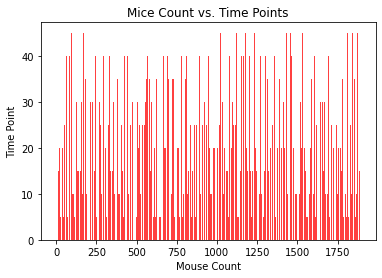

In [74]:
x_axis = np.arange(len(bar_df))
plt.bar(x_axis, bar_df["Timepoint"], color='r', alpha=0.75, align='center')
plt.title("Mice Count vs. Time Points")
plt.xlabel("Mouse Count")
plt.ylabel("Time Point")
plt.show()

In [75]:
#bar_df2 = merged_df.groupby[["Mouse ID", "Timepoint"]]


In [76]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.

In [77]:
bar_df.head()

,Mouse ID,Timepoint
460,a203,30
461,a203,35
459,a203,25
458,a203,20
457,a203,15


TypeError: 'value' must be an instance of str or bytes, not a int

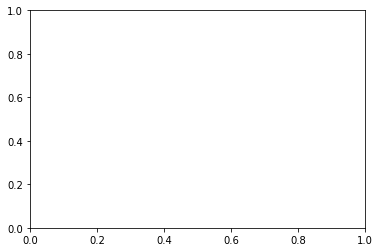

In [78]:
plt.hist(bar_df)
plt.title("Mouse ID versus Time Point")
plt.xlabel("Mouse ID")
plt.ylabel("Time Point")
plt.show()

In [ ]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.

## Pie Plots

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 


In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and Scatter Plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen



## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
